In [28]:
import pandas as pd
from dython import nominal

def load_raw_dataset(f):
    with open(f, 'r', encoding='utf8') as f:
        data = f.read().strip()
        sentences = [s.split('\n') for s in data.split('\n\n') if not s.startswith('-DOCSTART-')]
        X = [t.split(' ') for s in sentences for t in s if len(s) > 0]
        for i, s in enumerate(X):
            X[i] = X[i][2:5] + X[i][7:]
        return X

X = load_raw_dataset('../data/ner_on_html/train')
X += load_raw_dataset('../data/ner_on_html/valid')
X += load_raw_dataset('../data/ner_on_html/test')

In [38]:
data = {}

data['words']         = [x[0 ] for x in X]
data['exact_match']   = [int(x[1]) for x in X]
data['partial_match'] = [int(x[2]) for x in X]
data['email']         = [int(x[3]) for x in X]
data['number']        = [int(x[4]) for x in X]
data['honorific']     = [int(x[5]) for x in X] 
data['url']           = [int(x[6]) for x in X]
data['capitalized']   = [int(x[7]) for x in X]
data['punctuation']   = [int(x[8]) for x in X]
data['html_tag']      = [x[9 ] for x in X]
data['css_class']     = [x[10] for x in X]

In [39]:
data['words'][0]
df = pd.DataFrame(data)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


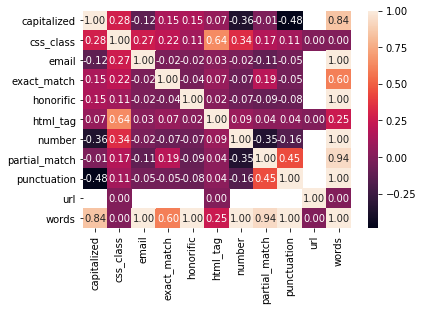

In [40]:
nominal.associations(df, nominal_columns=['words','html_tag', 'css_class'])

### How to do it: https://github.com/shakedzy/dython/issues/2

Calculates Cramer's V statistic for categorical-categorical association.
Uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328.
This is a symmetric coefficient: V(x,y) = V(y,x)

https://github.com/shakedzy/dython/blob/master/dython/nominal.py
https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

In [ ]:
-1.00, 0.28, -0.12, 0.15, 0.15, 0.07, -0.36, -0.01, -0.48, 0.00, 0.84
0.28, 1.00, 0.27, 0.22, 0.11, 0.64, 0.34, 0.17, 0.11, 0.00, 0.00
-0.12, 0.27, 1.00, -0.02, -0.02, 0.03, -0.02, -0.11, -0.05, 0.00, 1.00
0.15, 0.22, -0.02, 1.00, -0.04, 0.07, -0.07, 0.19, -0.05, 0.00, 0.60
0.15, 0.11, -0.02, -0.04, 1.00, 0.02, -0.07, -0.09, -0.08, 0.00, 1.00
0.07, 0.64, 0.03, 0.07, 0.02, 1.00, 0.09, 0.04, 0.04, 0.00, 0.25
-0.36, 0.34, -0.02, -0.07, -0.07, 0.09, 1.00, -0.35, -0.16, 0.00, 1.00
-0.01, 0.17, -0.11, 0.19, -0.09, 0.04, -0.35, 1.00, 0.45, 0.00, 0.94
-0.48, 0.11, -0.05, -0.05, -0.08, 0.04, -0.16, 0.45, 1.00, 0.00, 1.00
0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00
0.84, 0.00, 1.00, 0.60, 1.00, 0.25, 1.00, 0.94, 1.00, 0.00, 1.00